In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and sheet
file_path = r"C:\Users\Legion\OneDrive - Swinburne Sarawak\Y3S2\COS30015 IT Security\PracticalProject\CategorisedSpamMail\all_email_trace_results.xlsx"
sheet_name = "All"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display basic info about the data
print(df.info())
print(df.head())

# Helper function to group top N and "Others"
def group_top_n(series, n=10):
    counts = series.value_counts()
    top = counts.nlargest(n)
    others = counts.iloc[n:].sum()
    grouped = top.append(pd.Series({'Others': others}))
    return grouped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file           1396 non-null   object 
 1   from           1395 non-null   object 
 2   subject        1385 non-null   object 
 3   ip             1396 non-null   object 
 4   country        1316 non-null   object 
 5   org            1125 non-null   object 
 6   region         1316 non-null   object 
 7   vt_malicious   352 non-null    float64
 8   vt_suspicious  352 non-null    float64
 9   vt_undetected  352 non-null    float64
dtypes: float64(3), object(7)
memory usage: 109.2+ KB
None
                                     file  \
0  00001.317e78fa8ee2f54cd4890fdc09ba8176   
1  00008.ccf927a6aec028f5472ca7b9db9eee20   
2  00009.1e1a8cb4b57532ab38aa23287523659d   
3  00012.cb9c9f2a25196f5b16512338625a85b4   
4  00014.13574737e55e51fe6737a475b88b5052   

                                   

C:\Users\Legion\AppData\Local\Temp\ipykernel_412\3940027964.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped = top.append(pd.Series({'Others': others}))


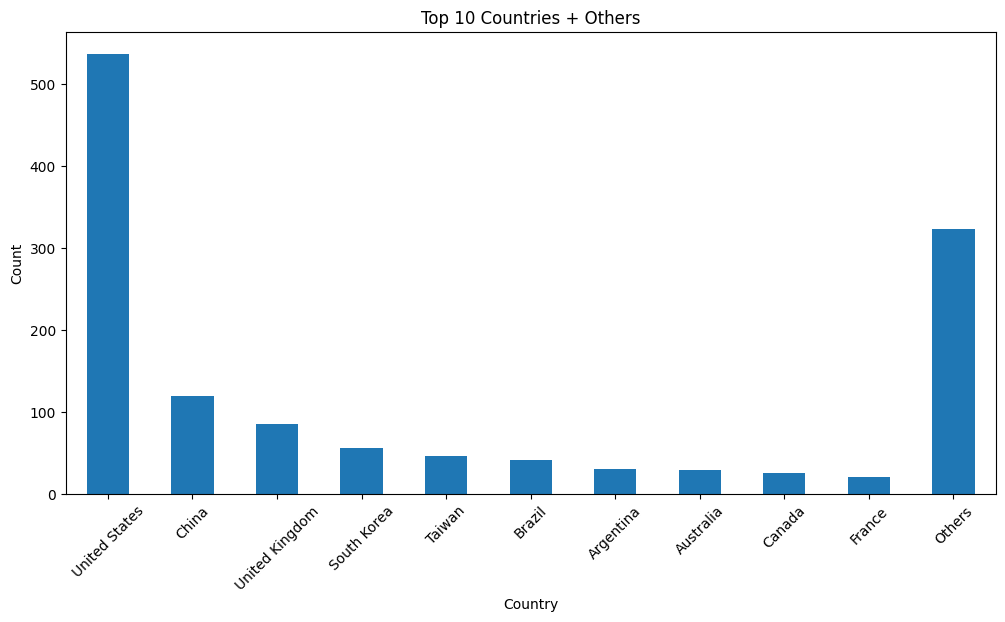

In [7]:
# Histogram of 'country' column
country_grouped = group_top_n(df['country'], 10)
plt.figure(figsize=(12,6))
country_grouped.plot(kind='bar')
plt.title("Top 10 Countries + Others")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Legion\AppData\Local\Temp\ipykernel_412\3940027964.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped = top.append(pd.Series({'Others': others}))


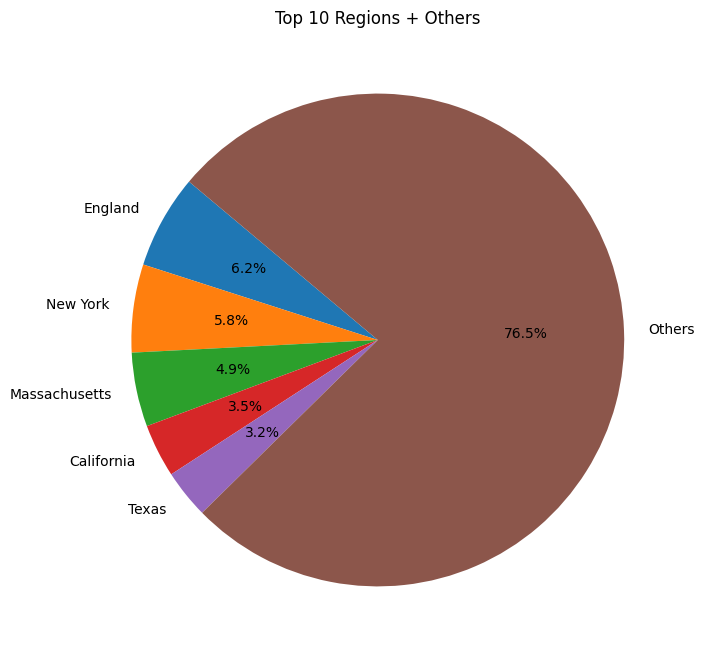

In [9]:
# Pie chart of 'region' column
region_grouped = group_top_n(df['region'], 5)
plt.figure(figsize=(8,8))
region_grouped.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Regions + Others")
plt.ylabel("")
plt.show()

In [10]:
# Frequency table for 'org' column
org_freq = df['org'].value_counts()
print("Frequency Table for 'org' column:")
print(org_freq.head(20))  # Show top 20 orgs

Frequency Table for 'org' column:
Verizon Business                   90
Kornet                             30
Spectrum                           23
Level 3, LLC                       20
CenturyLink Communications, LLC    18
Chunghwa Telecom Co. Ltd.          16
NTT America, Inc                   15
Microsoft Azure Cloud (eastus)     14
Foxtel Management Pty Ltd          13
Altamaha Fiber                     12
CenturyLink, Inc                   12
Allstream Business US, LLC         11
DoD Network Information Center     11
Level 3 Communications, Inc.       10
TELEF�NICA BRASIL S.A              10
NC Taiwan Co., Ltd                  9
Sprint                              9
AT&T Enterprises, LLC               9
Chinanet GD                         9
Tata Communications Limited         9
Name: org, dtype: int64
